<a href="https://colab.research.google.com/github/austinslee/CS235-Tumor-Machine-Learning/blob/main/SpectralClustering_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Clustering Jupyter Notebook

## References
https://people.orie.cornell.edu/dpw/orie6334/Fall2016/lecture7.pdf
https://www.analyticsvidhya.com/blog/2021/11/understanding-k-means-clustering-in-machine-learningwith-examples/

## Libraries
These are the libraries necessary for my implementation of spectral clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import normalized_mutual_info_score
import numpy as np
import pandas as pd
import random
import math

## Dataset Selection
There are two sections of commented code. The first section is the code necessary to load and preprocess data.csv which is the Breast Cancer Wisconsin Diagnostic Dataset. The second section is the code necessary to load and preprocess implementation_correctness_dataset.csv which is the dataset given to us for implementation correctness by the professor. For the purpose of the rest of this notebook, I will be showing the results of the implementation_correctness_dataset.csv as data.csv is too large to realistically output matrices/graphs. Output below the code is matrix of the dataset

In [ ]:
"""
#Uncomment to use data.csv. Column id, Unnamed, and diagnosis are dropped from the dataset.
df = pd.read_csv("../data.csv")
df['diagnosis'].replace(['M','B'],[1,0], inplace=True)
groundtruth = df[['diagnosis']].to_numpy()
groundtruth = groundtruth.flatten()
remove_cols = [col for col in df.columns if 'Unnamed' in col]
remove_cols_test = [col for col in df.columns if 'diagnosis' in col]
remove_cols_id = [col for col in df.columns if 'id' in col]
df.drop(remove_cols, axis='columns', inplace=True)
df.drop(remove_cols_test, axis='columns', inplace=True)
df.drop(remove_cols_id, axis='columns', inplace=True)

anp = df.to_numpy()
n_Dim = anp.shape[0]
"""
#"""
#Uncomment to use implementation_correctness_dataset.csv. Column Class/Cluster is dropped from the dataset
df = pd.read_csv("../implementation_correctness_dataset.csv")
groundtruth = df[['Class/Cluster']].to_numpy()
groundtruth = groundtruth.flatten()
remove_cols_id = [col for col in df.columns if 'Class/Cluster' in col]
df.drop(remove_cols_id, axis='columns', inplace=True)

anp = df.to_numpy()
n_Dim = anp.shape[0]

#prints dataset
print(anp)
#"""


[[0.02       0.        ]
 [1.045      0.        ]
 [2.08       0.        ]
 [3.125      0.        ]
 [4.18       0.        ]
 [5.245      0.        ]
 [6.32       0.        ]
 [7.405      0.        ]
 [8.5        0.        ]
 [9.605      0.        ]
 [0.         1.005     ]
 [0.         2.04287094]
 [0.         3.15067663]
 [0.         4.36758347]
 [3.         1.62946271]
 [3.         2.26894388]
 [3.         2.92310397]]


## Graph Construction
The code below utilizes the function euclidean_distance to calculate the X nearest neighbors of each datapoint and creates an edge between them. In this case, I chose the value 2 as specified by the implementation correctness guidelines. This creates an undirected unweighted similarity graph.

In [ ]:
#function finds euclidean distance between two matrices
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)


#finds the X closest neighbors of each datapoint
#modify totSortArr.append(sortArr[:X]) where X is the X-1 nearest neighbors you wish to find.
sortArr = []
totSortArr = []
for row in anp:
    for count,row0 in enumerate(anp):
        dist = euclidean_distance(row, row0)
        sortArr.append((dist, count))
    sortArr.sort()
    totSortArr.append(sortArr[:3])
    sortArr.clear()

## Adjacency, Degree, Unnormalized Laplacian, Normalized Laplacian
The code section shown below creates an adjacency matrix from the unweighted undirected similarity graph. The degree matrix is then created from the adjacency matrix. The unnormalized Laplacian is then calculated along with the normalized Laplacian

In [ ]:
#Referenced https://people.orie.cornell.edu/dpw/orie6334/Fall2016/lecture7.pdf
#for step by step process of implementing Spectral Clustering

#Create from scratch the adjacency matrix of the unweighted undirected similarity graph where node i and node j are connected with an edge if
#datapoint i is among the 2 nearest neighbors of datapoint j,
#    OR
#datapoint j is among the 2 nearest neighbors of datapoint i
#kneighbors variable is our adjacency matrix
counter = 0
kneighbors = np.zeros((anp.shape[0],anp.shape[0]))
for count0, entry in enumerate(totSortArr):
    kneighbors[count0][entry[1][1]] = 1
    kneighbors[count0][entry[2][1]] = 1
    kneighbors[entry[1][1]][count0] = 1
    kneighbors[entry[2][1]][count0] = 1

print("Adjacency Matrix:")
print(kneighbors)


#calculate our degree matrix
DegreeMatrix = np.diag(kneighbors.sum(axis=1))

print("Degree Matrix:")
print(DegreeMatrix)

#calculate unnormalized Laplacian
L = DegreeMatrix - kneighbors

print("Unnormalized Laplacian")
print(L)

#calculate D^(-1/2). Needed form Normalized Laplacian
NormDegreeMatrix = np.copy(DegreeMatrix)
for i in range(0,n_Dim):
    NormDegreeMatrix[i,i] = 1 / math.sqrt(NormDegreeMatrix[i,i])

#calculate normalized Laplacian with formula NormL = D^(-1/2) * L * D^(-1/2)
NormL = np.matmul(NormDegreeMatrix,L)
NormL = np.matmul(NormL,NormDegreeMatrix)

print("Normalized Laplacian")
print(NormL)

Adjacency Matrix:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]]
Degree Matrix:
[[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

## Spectral Embeddings
The code section below utilizes the numpy library to perform eigenvalue decomposition on my normalized Laplacian. After recieving my eigenvalues and eigenvectors, as specified in the implementation correctness instructions, I take the two lowest non-zero eigenvalues and corresponding eigenvectors to create my spectral embeddings.

In [ ]:
#calculates eigenvalue and eigenvector of our laplacian
e, v = np.linalg.eig(NormL)
#eigenvalues
print('eigenvalues:')
print(e)
#eigenvectors
print('eigenvectors:')
print(v)

#takes the two lowest non-zero eigenvalues
test = v[1:3]

#Creates a matrix which has the corresponding eigenvectors as columns, saves each row or spectral embedding as a separate array.
#test1 is the variable that holds the spectral embeddings
test1 = np.zeros((v[0].shape[0],2))
for count, entry in enumerate(test[0]):
    test1[count][0] = test[0][count]
    test1[count][1] = test[1][count]

print("Spectral Embeddings")
print(test1)


eigenvalues:
[-4.16333634e-17  2.34693761e-02  1.07429742e-01  2.68455254e-01
  5.00000000e-01  7.75321940e-01  1.05578705e+00  1.95622281e+00
  1.83678321e+00  1.30174197e+00  1.67478865e+00  1.50000000e+00
  1.50000000e+00  1.50000000e+00  1.50000000e+00  1.01465364e-17
  1.50000000e+00]
eigenvectors:
[[-2.58198890e-01 -1.98117093e-01 -1.61745175e-01  4.11598946e-01
  -3.77964473e-01 -9.36840244e-02 -2.49203619e-01  3.17914922e-01
   4.10948794e-01  3.83544169e-01 -1.85427076e-01  1.82574186e-01
  -3.61518419e-02  3.67804640e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.58198890e-01 -1.22716465e-01 -3.16227766e-01  3.89367867e-01
   3.16713902e-16  3.89367867e-01 -3.16227766e-01 -3.89367867e-01
  -3.16227766e-01 -1.22716465e-01 -1.22716465e-01 -3.65148372e-01
   7.23036837e-02 -7.35609281e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.58198890e-01 -4.15556789e-02 -4.02765823e-01  1.58081088e-01
   3.77964473e-01  2.68648858e-01  2.84486447e-01  4.26729947e-

## Initial Centroids

The code section below shows a function used to create 2 random initial centroids from a dataset. The initial centroids are chosen at random from existing datapoints so the initial centroids will always be on top of a datapoint. The amount of initial centroids can be modified by changing the number 2 in the line "toReturn = np.zeros([2, data.shape[1]])" and changing the number 2 in line "for counter in range(2):"

In [ ]:
#randomly initialize 2 centroids from data set
def initialize_centroids(data):
    toReturn = np.zeros([2, data.shape[1]])
    for counter in range(2):
        randNum = random.randint(0,data.shape[0]-1)
        toReturn[counter] = data[randNum]
    return toReturn

## Cluster Assignments

The code section below contains all of the functions necessary for my implementation of updating the cluster assignments. The first function calcErr(a,b) calculates the root of the sum of squared errors between two points of data. The second function assignCengtroid(centroids, data) takes as input a list of all centroids and a point of data and returns the closest centroid along with the amount of error between the datapoint and centroid. The third function allAssignCentroid takes as input a list of centroids and a dataset, and returns a list of all datapoints and their corresponding cluster along with the amount of error.

In [ ]:


#calculates the root of the sum of squared errors
def calcErr(a,b):
    error = 0
    for x in range(a.shape[0]):
        error += (a[x]-b[x])**2
    error = math.sqrt(error)
    return error

#given a list of all centroids and a point of data, return the closest centroid and amount of err
def assignCentroid(centroids, data):
    errors = list()
    for centroid in range(centroids.shape[0]):
        error = calcErr(centroids[centroid], data)
        errors.append((error,centroid))
    errors.sort()
    return errors[0]

#Given centroids and dataset, returns a list of all datapoints, error and cluster assignment in the form of list((error, clusterAssignment), (error, clusterAssignment), ...)
def allAssignCentroid(centroids, data):
    toReturn = list()
    temp = list()
    for entry in data:
        temp = assignCentroid(centroids, entry)
        toReturn.append(temp)
    return toReturn

## Centroid Location Updates

The functions below are responsible for updating the centroid location. The function updateCentroid takes as input a list of centroids, a dataset, and a list of assignments that are generated from the function allAssignCentroid(centroids, data). The function then takes all the clusters/datapoints that are assigned to a centroid and calculates the mean value and updates the centroid location accordingly. This function does this for all centroids inputted. The function then returns the updated centroid locations.


In [ ]:

#This function returns an array of updated centroids whose positions are calculated based on cluster assignments and datapoints
#centroids is list of centroids, data is dataset, assignments is list of assignments based on assignCentroid. Returns updated centroid
def updateCentroid(centroids, data, assignments):
    #variable to hold new centroid locations
    newCentroids = []
    hold = [[] for x in range(centroids.shape[0])]
    #for loop taking all the datapoints that belong to a centroid and puts into variable hold.
    for x in range(len(assignments)):
        hold[assignments[x][1]].append(x)
    #for loop calculating the new centroid locations by taking the mean value. If a centroid has no datapoints assigned to it, it just stays in the same location
    for x in range(len(hold)):
        if len(hold[x]) > 0:
            c_k = np.mean(data[hold[x]],axis=0)
        else :
            c_k = centroids[x]
        newCentroids.append(c_k)
    return newCentroids


## Kmeans

The section below shows my function myKmeans(data, iterations) which uses all the functions displayed above to implement k-means clustering. My function takes as input a dataset and number of iterations you want k-means to last for, and returns the final centroid locations and cluster assignments. My implementation also has it so that if the objective function stays the same or increases, the function will return. I will output a scatterplot displaying the centroid location and cluster assignments for when numer of iterations is set to 3. Please note that 1 iteration count as both updating cluster assignments and centroid locations.

Please note that I put in scatterplots and print statements in my kmeans function solely for the purpose of displaying my results in jupyter notebook. For my complete implementation, I will take out these print() commands.

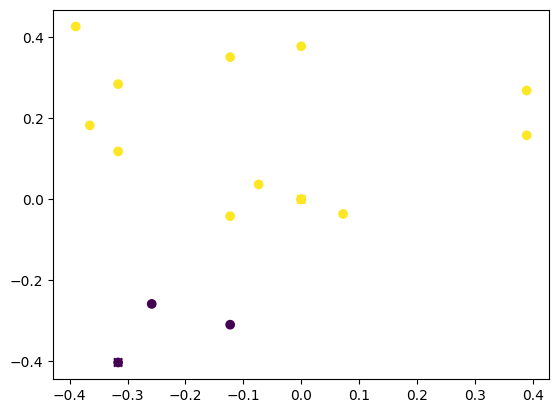

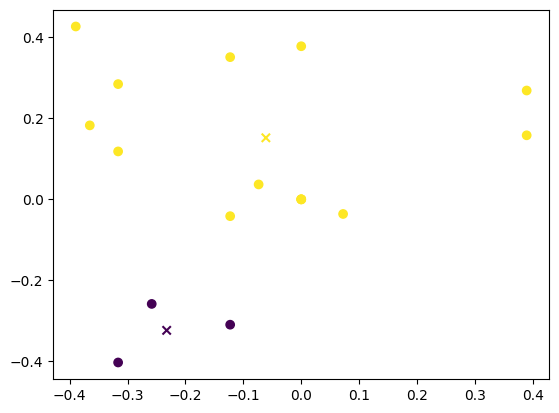

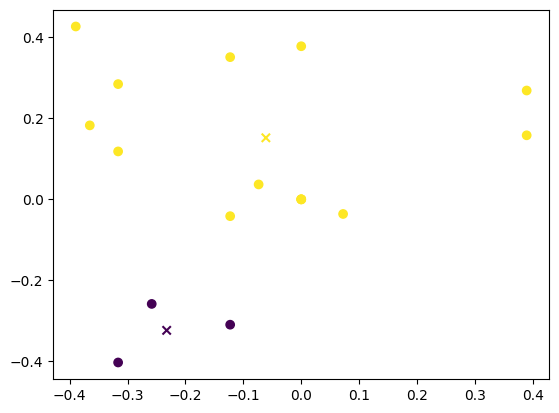

In [ ]:

#Kmeans function, given dataset and # of iterations, returns centroids and cluster assignments. Exits if objective function increases or stays the same
def myKmeans(data, iterations):
    centroids = initialize_centroids(data)
    updatedAssignments = allAssignCentroid(centroids,data)
    currErr = 0
    outputErr = 0
    oldCentroids = centroids
    #firstCheck is a variable used to skip the first time of checking objective function since oldErr and currErr is the same initially
    firstCheck = 0
    for y in range(len(updatedAssignments)):
            currErr += updatedAssignments[y][0]
    for x in range(iterations):

        #updating assignments
        oldAssignments = updatedAssignments
        updatedAssignments = allAssignCentroid(centroids,data)
        #Displaying scatterplot graph
        silh = []
        for iterator in range(len(updatedAssignments)):
            silh.append(updatedAssignments[iterator][1])
        col = [0,1]
        plt.scatter(data[:,0],data[:,1], c=silh, marker='o')
        plt.scatter(centroids[:,0], centroids[:,1], c=col, marker='x')
        plt.show()

        #checking if error decreased
        oldErr = currErr
        currErr = 0
        for y in range(len(updatedAssignments)):
            currErr += updatedAssignments[y][0]
        if oldErr <= currErr :
            if firstCheck == 1:
                return oldCentroids, oldAssignments
            firstCheck = 1
        #updating centroids
        oldCentroids = centroids
        centroids = np.array(updateCentroid(centroids, data, updatedAssignments))




    updatedAssignments = allAssignCentroid(centroids,data)
    return centroids, updatedAssignments



temp = myKmeans(test1, 3)

## Final Results and Evaluation

The section below shows a matrix with the final centroid locations and cluster assignments as well as a scatterplot displaying this information when my implementation is run for 10 iterations on the implementation_correctness_dataset.csv. I have also displayed my Silhouette Score and Normalized Mutual Information Score.


Final Centroid Locations
[[-0.00385283 -0.05314987]
 [-0.25161471  0.29017948]]
Final Cluster Assignments
[(0.3267063206866945, 0), (0.11942775955282743, 0), (0.468838369325528, 0), (0.4463642369447327, 0), (0.2664885848527406, 1), (0.5081111453610809, 0), (0.06486338036516379, 1), (0.1939638219378211, 1), (0.18364229447400293, 1), (0.28255470551054, 0), (0.14254492550323286, 1), (0.1564250358619785, 1), (0.07803042414392189, 0), (0.11378349805479342, 0), (0.0532893329502437, 0), (0.0532893329502437, 0), (0.0532893329502437, 0)]


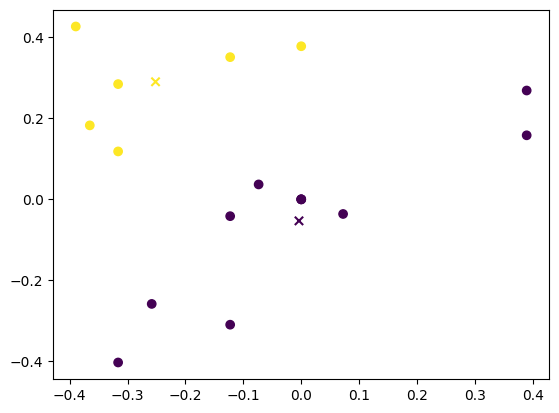

Silhouette Score
0.38481057655498
NMI
0.15575634360678023


In [ ]:

#Reprint of my kmeans implementation except without all the scatterplot graphs displaying the process in the middle
def myKmeans(data, iterations):
    centroids = initialize_centroids(data)
    updatedAssignments = allAssignCentroid(centroids,data)
    currErr = 0
    outputErr = 0
    oldCentroids = centroids
    #firstCheck is a variable used to skip the first time of checking objective function since oldErr and currErr is the same initially
    firstCheck = 0
    for y in range(len(updatedAssignments)):
            currErr += updatedAssignments[y][0]
    for x in range(iterations):

        #updating assignments
        oldAssignments = updatedAssignments
        updatedAssignments = allAssignCentroid(centroids,data)
        #checking if error decreased
        oldErr = currErr
        currErr = 0
        for y in range(len(updatedAssignments)):
            currErr += updatedAssignments[y][0]
        if oldErr <= currErr :
            if firstCheck == 1:
                return oldCentroids, oldAssignments
            firstCheck = 1
        #updating centroids
        oldCentroids = centroids
        centroids = np.array(updateCentroid(centroids, data, updatedAssignments))
    updatedAssignments = allAssignCentroid(centroids,data)
    return centroids, updatedAssignments


#Runs kmeans
x,y = myKmeans(test1, 10)
print("Final Centroid Locations")
print(x)
print("Final Cluster Assignments")
print(y)

#Display Scatterplot
silh = []
for iterator in range(len(y)):
    silh.append(y[iterator][1])
col = [0,1]
plt.scatter(test1[:,0],test1[:,1], c=silh, marker='o')
plt.scatter(x[:,0], x[:,1], c=col, marker='x')
plt.show()

#print Silhouette score and NMI
print("Silhouette Score")
print(silhouette_score(test1, silh))
print("NMI")
nmi = normalized_mutual_info_score (groundtruth, silh)
print(nmi)